In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv')
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

**From the above info of the dataset it shows there is no null values for any coulmn**

In [4]:
data.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


### Categorical fields data analysis

**Find all the categorical columns in the dataset**

In [5]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"categorical columns are : {categorical_cols}")

categorical columns are : ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type']


**Since the above approach does not takes categorical fields like Gender, Own_car.. etc, We are going to create categorical field list**

In [6]:
categorical_cols = categorical_cols + ['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']
print(f"categorical columns are : {categorical_cols}")

categorical columns are : ['Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']


**For each ctaegorical column show records for each category**

In [7]:
for i in data[categorical_cols]:
    print("\n")
    print(f"Distinct Value Counts of {i} :\n",data[i].value_counts())
    print("\n")



Distinct Value Counts of Income_type :
 Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64




Distinct Value Counts of Education_type :
 Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64




Distinct Value Counts of Family_status :
 Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64




Distinct Value Counts of Housing_type :
 Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64




Distinct V

**Define functionto show records for each category in bar plot**

In [8]:
def plot_categorical_counts(data, categorical_fields, plots_per_row=2):
    # Number of categorical fields
    num_fields = len(categorical_fields)
    
    # Determine the number of rows needed
    num_rows = (num_fields + plots_per_row - 1) // plots_per_row
    
    # Create a figure with the appropriate size
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 12, num_rows * 6))
    
    # Flatten the axes array for easy iteration if necessary
    if num_fields == 1:
        axes = [axes]
    elif num_rows == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    # Loop over each categorical field and create a count plot
    for i, field in enumerate(categorical_fields):
        sns.countplot(data=data, x=field, hue='Target', palette='viridis', ax=axes[i])
        axes[i].set_title(f'Count of {field} with Target Variable')
        axes[i].set_xlabel(field)
        axes[i].set_ylabel('Count')
        
        # Adding the count labels on each bar
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].annotate(f'{height}', 
                             (p.get_x() + p.get_width() / 2., height), 
                             ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                             textcoords='offset points')
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

**Show records for each category in bar plot**

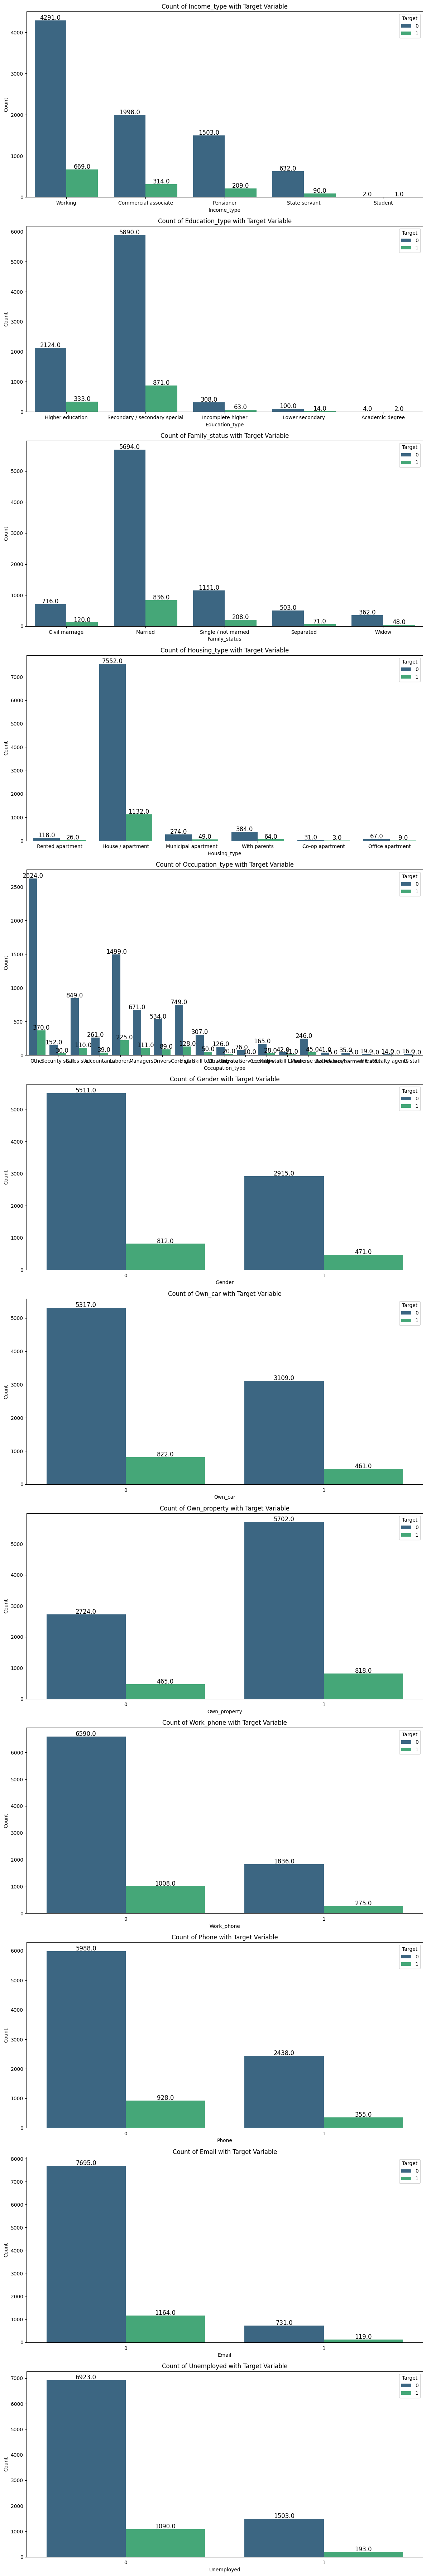

In [9]:
# Call the function with the sample data and categorical fields
plot_categorical_counts(data, categorical_cols, 1)

**Show records for each target type in a bar plot**

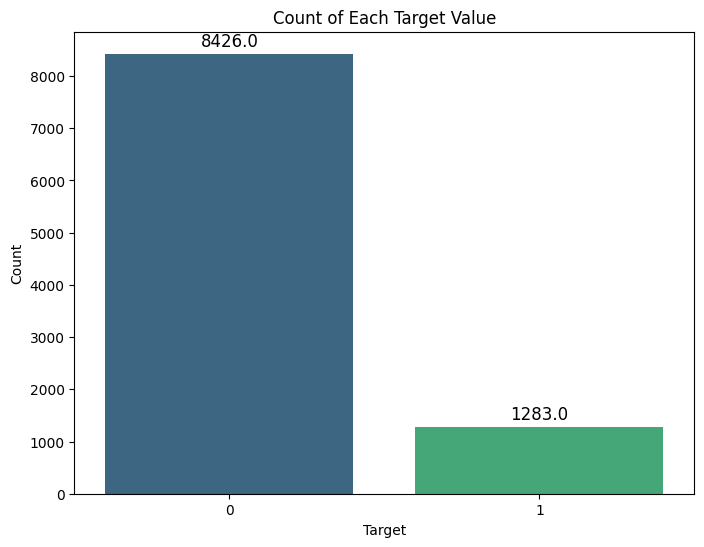

In [10]:
# Plotting the count of each Target value
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Target', palette='viridis')
plt.title('Count of Each Target Value')
plt.xlabel('Target')
plt.ylabel('Count')

# Adding the count labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

To analyze the eligibility for a credit card based on the provided distinct value counts for various categorical variables, we can infer some insights. Although the eligibility criteria are not explicitly mentioned, we can identify patterns and make assumptions based on common financial and demographic indicators. Here’s an analysis of each categorical variable:

### Income_type
- **Working**: Majority (4960) are working, which generally indicates a stable income.
- **Commercial associate**: A significant number (2312) are commercial associates, indicating business-related income.
- **Pensioner**: A considerable group (1712) are pensioners, indicating retirement income.
- **State servant**: A moderate number (722) are state servants, suggesting government job stability.
- **Student**: Very few (3) are students, who typically have lower income and financial stability.

**Analysis**: Those who are working or have a business-related income might be more likely to get approved for a credit card due to stable income. Pensioners and state servants also show financial stability. Students, with their low count, may have a harder time qualifying unless other factors are favorable.

### Education_type
- **Secondary / secondary special**: Majority (6761) have secondary education.
- **Higher education**: A significant number (2457) have higher education.
- **Incomplete higher**: A moderate number (371) have incomplete higher education.
- **Lower secondary**: A smaller group (114) have lower secondary education.
- **Academic degree**: Very few (6) have an academic degree.

**Analysis**: Higher education generally correlates with better job opportunities and income, potentially increasing eligibility. Secondary education is very common, and while it may offer stability, those with higher education might have an advantage.

### Family_status
- **Married**: Majority (6530) are married, indicating potentially stable households.
- **Single / not married**: A significant number (1359) are single.
- **Civil marriage**: A moderate number (836) are in civil marriages.
- **Separated**: Some (574) are separated.
- **Widow**: A smaller group (410) are widowed.

**Analysis**: Married individuals often have dual incomes or more financial stability, which could increase eligibility. Single individuals might have fewer financial obligations but also fewer income sources. Civil marriages, separated, and widowed statuses might require more context to analyze thoroughly.

### Housing_type
- **House / apartment**: Majority (8684) live in a house or apartment, indicating stable housing.
- **With parents**: Some (448) live with parents.
- **Municipal apartment**: A moderate number (323) live in municipal apartments.
- **Rented apartment**: Some (144) live in rented apartments.
- **Office apartment**: Few (76) live in office apartments.
- **Co-op apartment**: Very few (34) live in co-op apartments.

**Analysis**: Homeownership or stable housing is a positive indicator for credit eligibility. Those living with parents or in rented apartments might face more scrutiny unless they have stable incomes.

### Occupation_type
- **Other**: A large group (2994) falls under 'Other'.
- **Laborers**: A significant number (1724) are laborers.
- **Sales staff**: A moderate number (959) are sales staff.
- **Core staff**: A significant number (877) are core staff.
- **Managers**: A considerable group (782) are managers.
- **Drivers**: Some (623) are drivers.
- **High skill tech staff**: A moderate number (357) are high-skill tech staff.
- **Accountants**: Some (300) are accountants.
- **Medicine staff**: A moderate number (291) are in medicine.
- **Cooking staff**: A smaller group (193) are cooking staff.
- **Security staff**: Some (182) are security staff.
- **Cleaning staff**: Some (146) are cleaning staff.
- **Private service staff**: A smaller group (86) are in private service.
- **Low-skill Laborers**: Few (53) are low-skill laborers.
- **Secretaries**: Very few (46) are secretaries.
- **Waiters/barmen staff**: Few (40) are waiters/barmen staff.
- **HR staff**: Very few (22) are HR staff.
- **IT staff**: Very few (18) are IT staff.
- **Realty agents**: Very few (16) are realty agents.

**Analysis**: Stable and higher-paying jobs (managers, core staff, high skill tech staff) are positive indicators for credit eligibility. Occupations like laborers, sales staff, and other lower-paying jobs might face more challenges unless they have other positive financial factors.

### Gender
- **0**: Majority (6323) are one gender (assumed to be male).
- **1**: A significant number (3386) are another gender (assumed to be female).

**Analysis**: Gender alone is not a determining factor for credit eligibility but could influence household income and financial behavior patterns.

### Own_car
- **0**: A significant number (6139) do not own a car.
- **1**: Many (3570) own a car.

**Analysis**: Car ownership could be a positive indicator of financial stability and ability to manage monthly payments, increasing credit eligibility.

### Own_property
- **1**: Majority (6520) own property.
- **0**: A significant number (3189) do not own property.

**Analysis**: Property ownership is a strong indicator of financial stability and can positively impact credit eligibility.

### Work_phone
- **0**: Majority (7598) do not have a work phone.
- **1**: A significant number (2111) have a work phone.

**Analysis**: Having a work phone could indicate employment stability, which might positively influence credit eligibility.

### Phone
- **0**: Majority (6916) do not have a phone.
- **1**: A significant number (2793) have a phone.

**Analysis**: Phone ownership is expected for communication, and not having one might negatively impact credit eligibility.

### Email
- **0**: Majority (8859) do not have an email.
- **1**: Few (850) have an email.

**Analysis**: Email ownership is essential for modern communication, and not having one might negatively impact credit eligibility.

### Overall Analysis
- **Income Stability**: Individuals with stable and higher incomes (working, commercial associate, state servant) and those with property and car ownership are more likely to be eligible.
- **Education and Occupation**: Higher education and stable occupations like managers, core staff, and high-skill tech staff are positive indicators.
- **Housing and Marital Status**: Homeownership and being married generally indicate stability and increase eligibility.
- **Communication Means**: Having a phone and email are necessary for modern financial communication and impact eligibility.

By considering these factors, credit eligibility can be better assessed. However, a more detailed and specific analysis would require additional financial information, such as income levels, debt-to-income ratios, credit history, etc.

### 

### Numeric fields data analysis

In [11]:
# getting all numeric fields exculding ID field
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('ID')
print(f'Numeric fields: {numeric_cols}')

Numeric fields: Index(['Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email',
       'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Target'],
      dtype='object')


In [12]:
numeric_cols = ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']
print(f'Numeric fields: {numeric_cols}')

Numeric fields: ['Num_children', 'Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']


**Since the above numeric field list gives columns which are actually a categorical field like Gender, we are going to define the numeric fields by ourself instead from the above list**

In [13]:
def plot_boxplots(data, numeric_cols):
    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=data, x=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

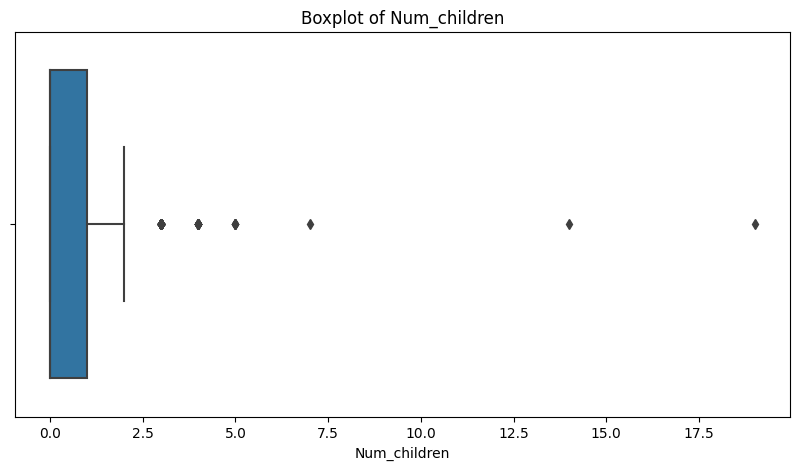

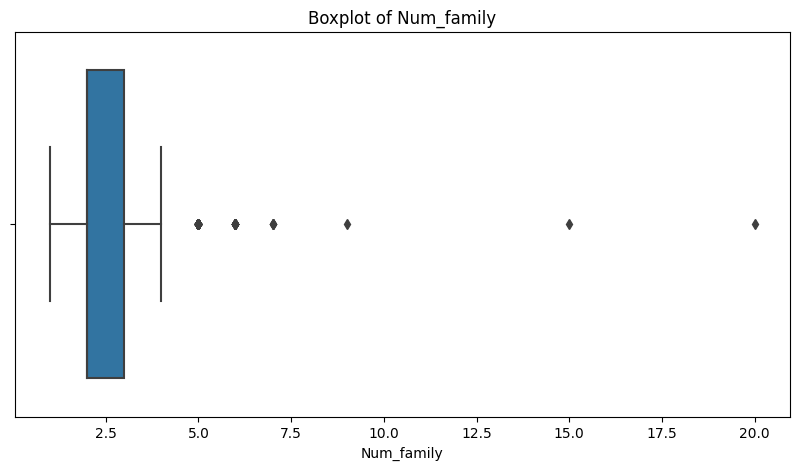

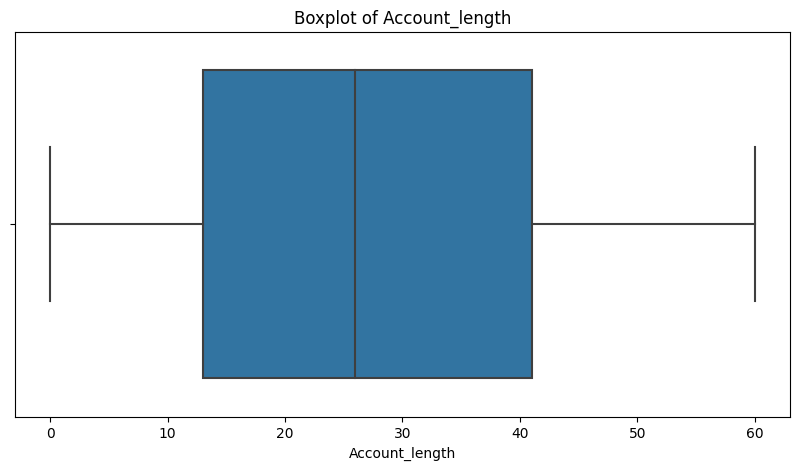

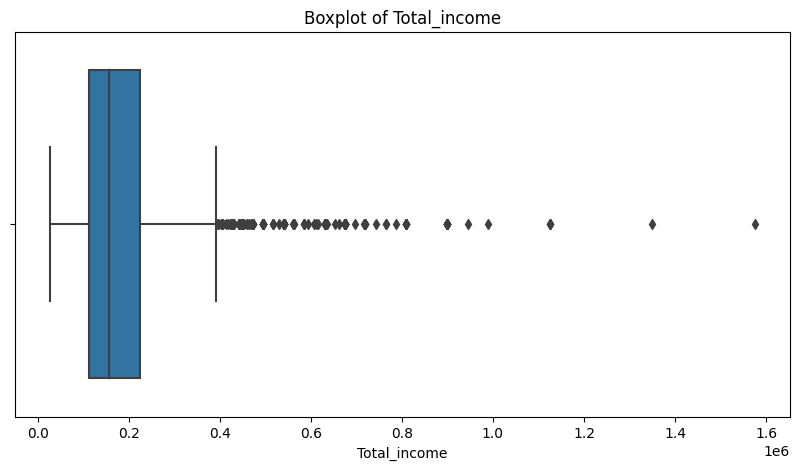

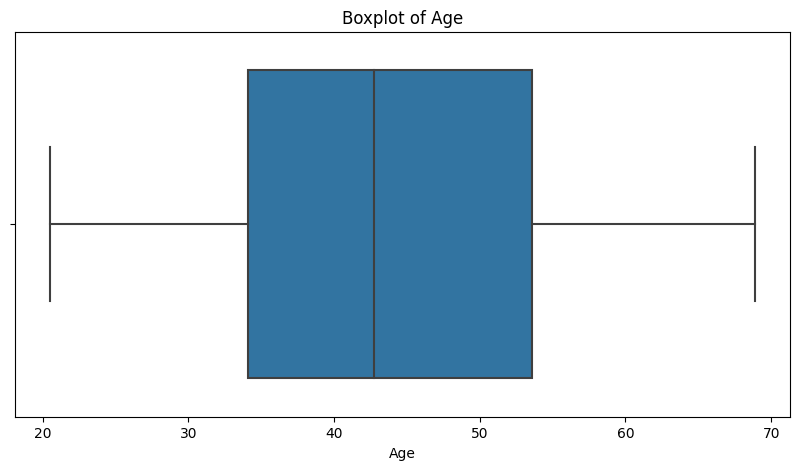

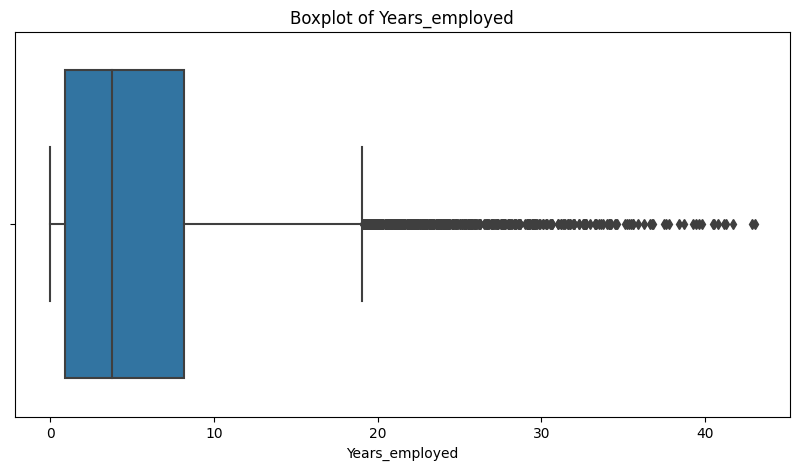

In [14]:
plot_boxplots(data, numeric_cols)

**We can clearly see there are some outliers for colums like Num_children, Num_family, Total_income,Years_employed.**

**Now we are going to create a method which will detect the outlier using IQR(Interquartile Range) method for each fields and remove those records from the dataset**

In [15]:
def remove_outliers_iqr(data, columns=None):
    if columns is None:
        columns = data.select_dtypes(include=[np.number]).columns
    
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

In [16]:
# Remove outliers using IQR method
cleaned_df = remove_outliers_iqr(data, numeric_cols)

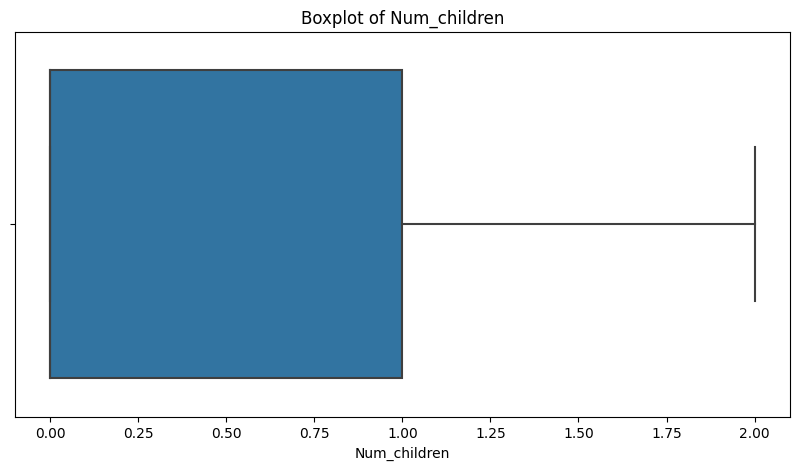

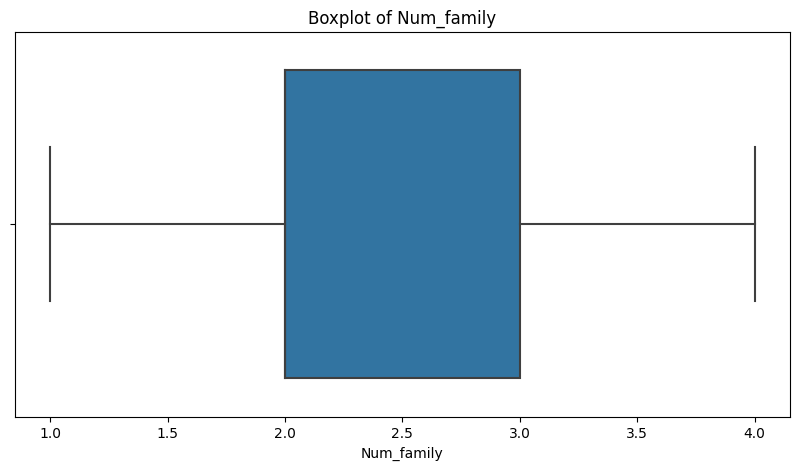

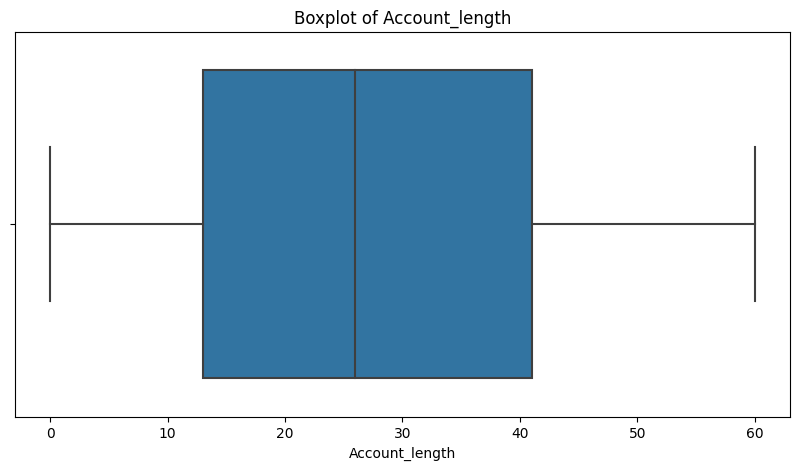

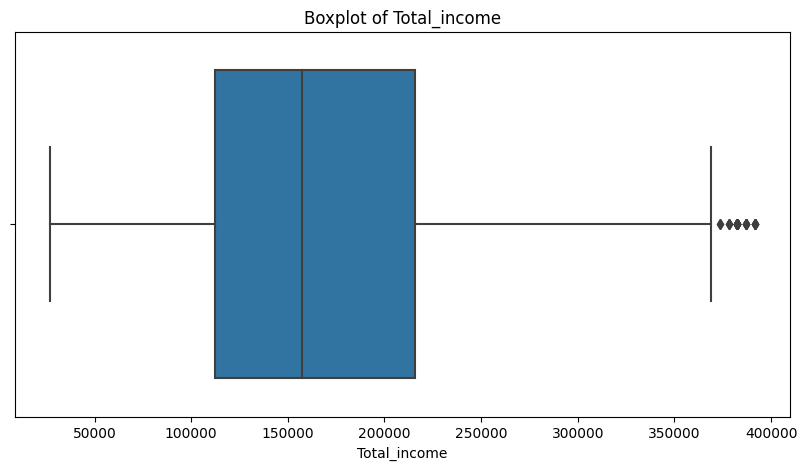

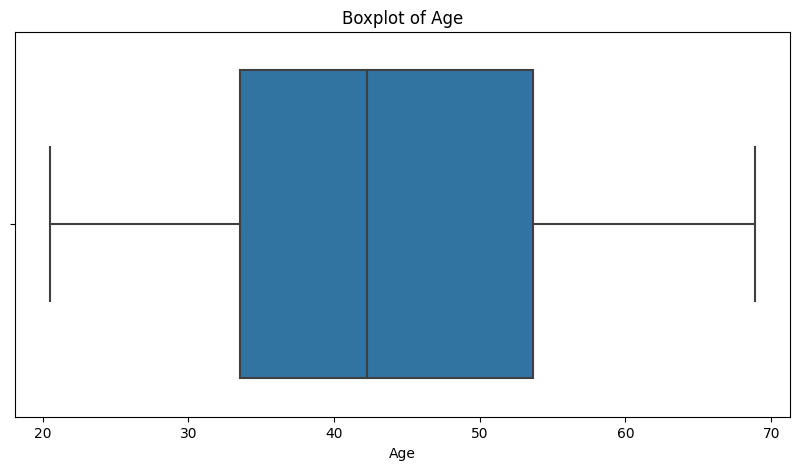

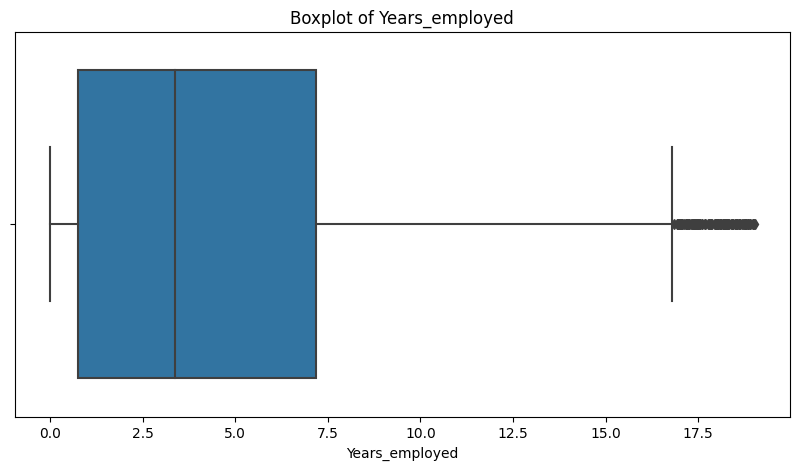

In [17]:
plot_boxplots(cleaned_df, numeric_cols)

In [18]:
def plot_data_distribution(data, numeric_fields=None, plots_per_row=2):
    if numeric_fields is None:
        numeric_fields = data.select_dtypes(include=[np.number]).columns
    
    # Plot Numeric Fields
    num_numeric_fields = len(numeric_fields)
    num_rows_numeric = (num_numeric_fields + plots_per_row - 1) // plots_per_row
    
    fig, axes = plt.subplots(num_rows_numeric, plots_per_row, figsize=(plots_per_row * 6, num_rows_numeric * 6))
    
    if num_numeric_fields == 1:
        axes = [axes]
    elif num_rows_numeric == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()
    
    for i, field in enumerate(numeric_fields):
        sns.histplot(data=data, x=field, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {field}')
        axes[i].set_xlabel(field)
        axes[i].set_ylabel('Frequency')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


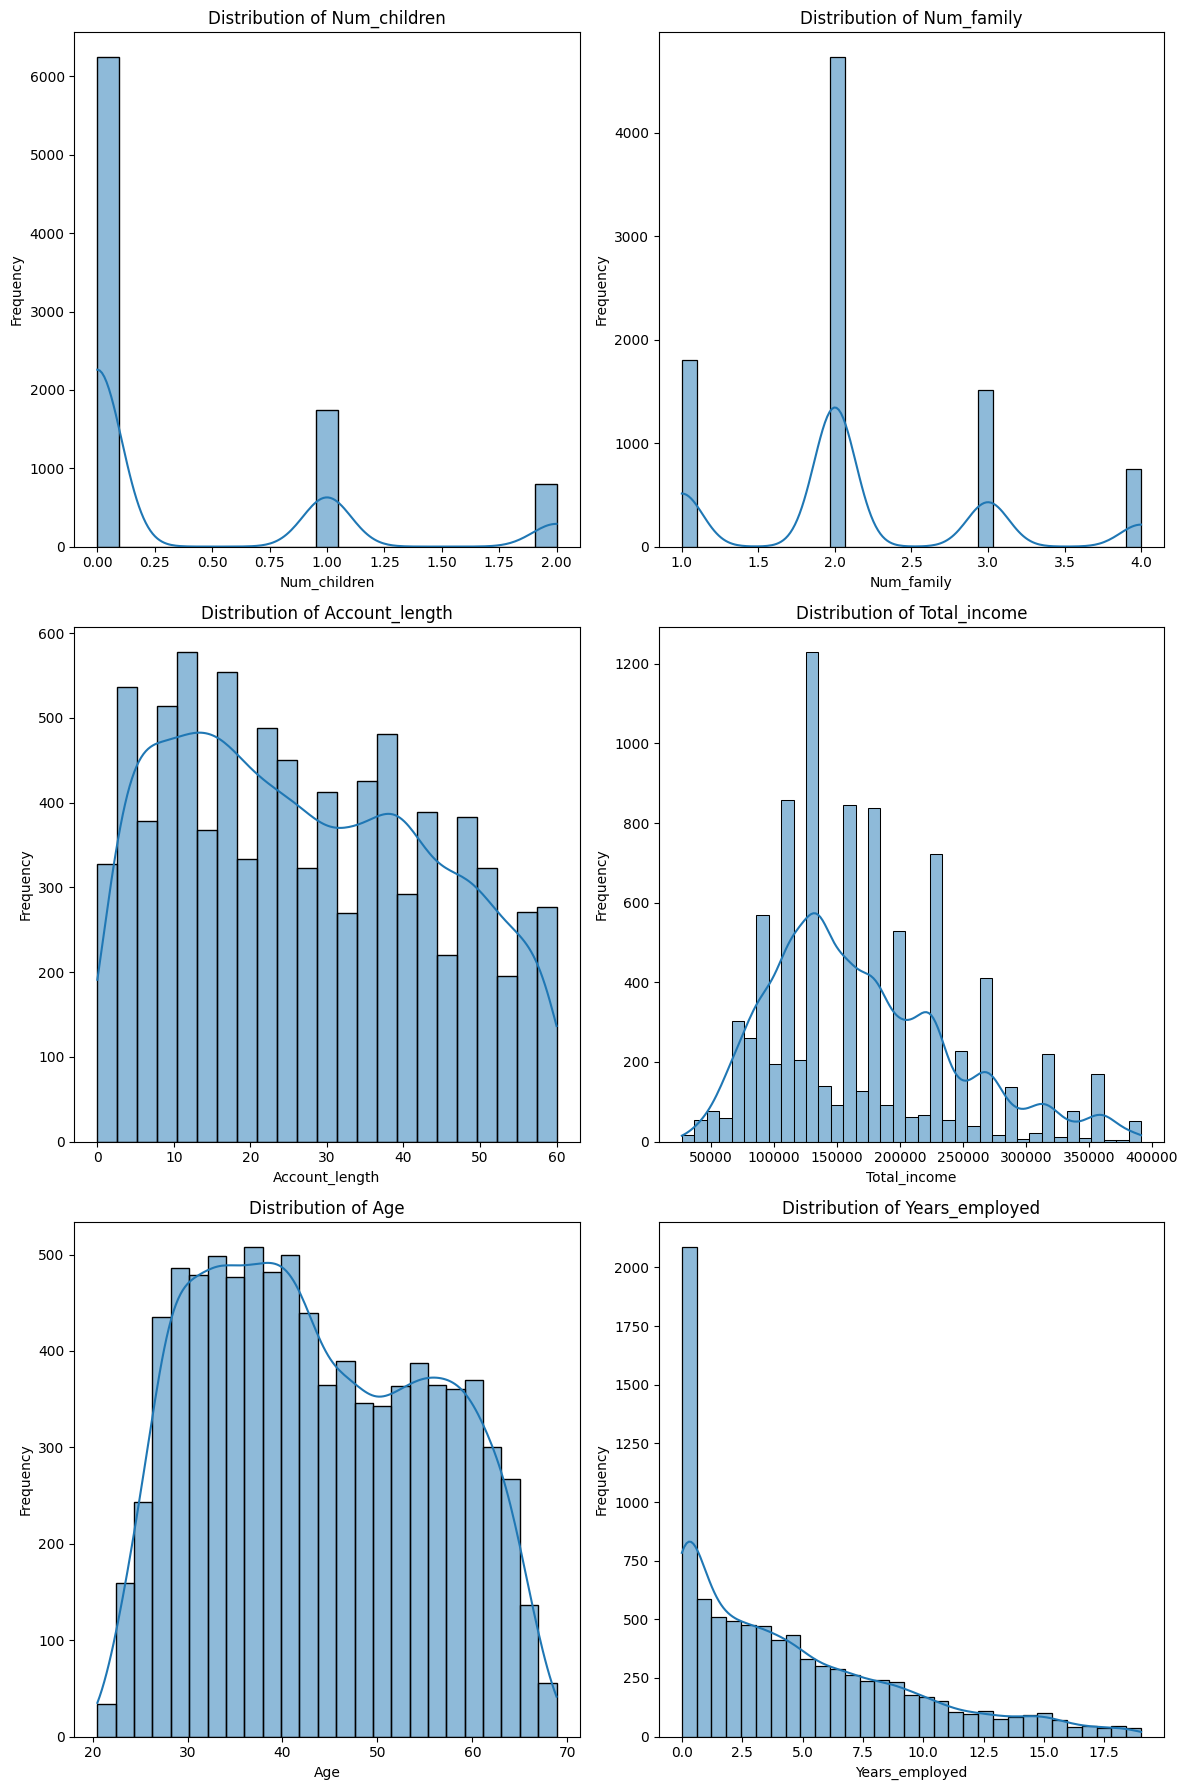

In [19]:
# Call the function with the sample data and fields
plot_data_distribution(cleaned_df, numeric_cols, plots_per_row=2)

**Showing corrleation matrix for numeric fields using heat map**

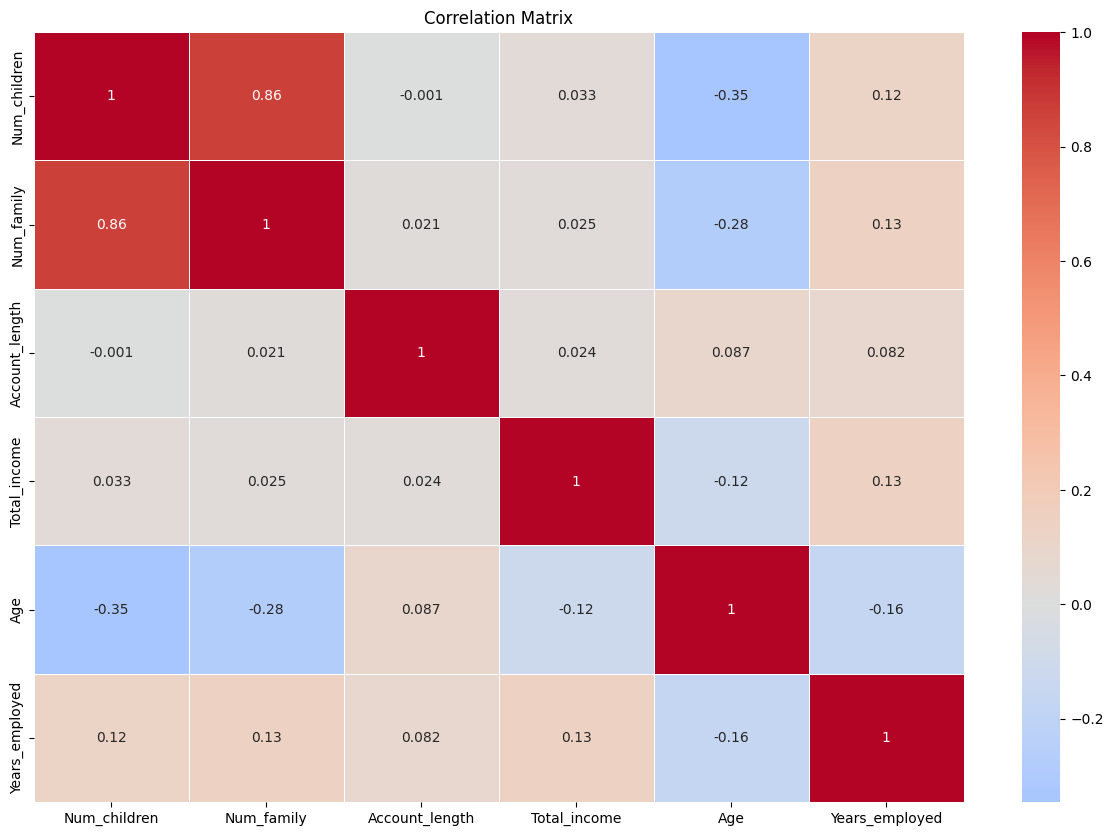

In [20]:
# Calculate the correlation matrix
corr_matrix = cleaned_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Strong Positive Correlations
1. **Num_children and Num_family (0.860)**
   - There is a strong positive correlation between the number of children and the number of family members. This makes intuitive sense, as more children typically lead to a larger family size.

### Moderate Positive Correlations
2. **Num_family and Years_employed (0.134)**
   - There is a moderate positive correlation between the number of family members and the years of employment. This might suggest that individuals with larger families tend to have longer employment durations, possibly due to the financial responsibilities associated with a larger family.

3. **Total_income and Years_employed (0.135)**
   - There is a moderate positive correlation between total income and years employed. This is expected, as individuals tend to earn more as they gain more experience in their careers.

### Weak Positive Correlations
4. **Num_children and Years_employed (0.122)**
   - There is a weak positive correlation between the number of children and years of employment. This could indicate that individuals with more children tend to be employed for longer periods, possibly due to the need for stable income.

5. **Num_family and Account_length (0.021)**
   - There is a weak positive correlation between the number of family members and account length. This suggests a slight tendency for larger families to maintain longer account histories.

6. **Account_length and Total_income (0.024)**
   - There is a weak positive correlation between account length and total income. This might indicate that those with higher incomes tend to have longer account histories.

### Weak Negative Correlations
7. **Total_income and Age (-0.117)**
   - There is a weak negative correlation between total income and age. This could suggest that total income might decrease slightly with age, possibly due to retirement or career shifts.

8. **Age and Years_employed (-0.164)**
   - There is a weak negative correlation between age and years employed. This might be due to individuals reaching retirement age and thus having fewer years employed.

### Moderate Negative Correlations
9. **Num_children and Age (-0.346)**
   - There is a moderate negative correlation between the number of children and age. This suggests that older individuals tend to have fewer children, which aligns with the typical life cycle where younger adults are more likely to have dependent children.

10. **Num_family and Age (-0.276)**
    - There is a moderate negative correlation between the number of family members and age. This could indicate that older individuals generally have smaller family sizes, potentially due to children growing up and leaving the household.

### Very Weak Correlations
11. **Account_length and other variables**
    - Account length shows very weak correlations with most other variables, suggesting that it is relatively independent of the number of children, number of family members, total income, age, and years employed.

### Summary
- **Family Dynamics**: The strong correlation between the number of children and the number of family members highlights the impact of children on family size.
- **Employment and Income**: Years employed correlates positively with both total income and the number of family members, indicating that longer employment duration contributes to higher income and possibly supports larger families.
- **Age Relationships**: Age has negative correlations with both the number of children and the number of family members, reflecting demographic trends where older individuals have smaller and possibly independent families.
- **Account Length**: This variable shows weak correlations with others, implying it might be influenced by different factors not captured in this matrix.

Overall, the correlations give insights into family composition, employment, income relationships, and the demographic characteristics of the dataset.

## Model Building

In [21]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [22]:
random_state = 42

In [23]:
cleaned_df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0


In [24]:
#Remove Id field from the data
df = cleaned_df.drop(columns = ['ID'])

In [25]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0


In [26]:
# Split the dataset into features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

In [27]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [28]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
# Fit the preprocebyteswapssing pipeline to the training data
preprocessor.fit(X_train)

# Transform the training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [30]:
X_train_processed.shape, X_test_processed.shape

((7033, 60), (1759, 60))

### Logistic Regression

In [31]:
# Train a logistic regression model on the processed data
logreg = LogisticRegression()
logreg.fit(X_train_processed, y_train)

LogisticRegression()

In [32]:
# Predict using the logistic regression model
logreg_predictions = logreg.predict(X_test_processed)

In [33]:
# Define a function to evaluate a model
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

In [34]:
# Evaluate Logistic Regression
evaluate_model(y_test, logreg_predictions, "Logistic Regression")

Logistic Regression Evaluation:
Accuracy: 0.8766
Precision: 1.0000
Recall: 0.0181
F1 Score: 0.0356


Confusion Matrix:
[[1538    0]
 [ 217    4]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1538
           1       1.00      0.02      0.04       221

    accuracy                           0.88      1759
   macro avg       0.94      0.51      0.48      1759
weighted avg       0.89      0.88      0.82      1759





### Random Forest Model

In [35]:
# Train a random forest model on the processed data
rf = RandomForestClassifier(n_estimators=300, random_state=random_state)
rf.fit(X_train_processed, y_train)

# Predict using the random forest model
rf_predictions = rf.predict(X_test_processed)

In [36]:
# Evaluate Logistic Regression
evaluate_model(y_test, rf_predictions, "ReandomForest Model")

ReandomForest Model Evaluation:
Accuracy: 0.8744
Precision: 0.5000
Recall: 0.0136
F1 Score: 0.0264


Confusion Matrix:
[[1535    3]
 [ 218    3]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1538
           1       0.50      0.01      0.03       221

    accuracy                           0.87      1759
   macro avg       0.69      0.51      0.48      1759
weighted avg       0.83      0.87      0.82      1759



